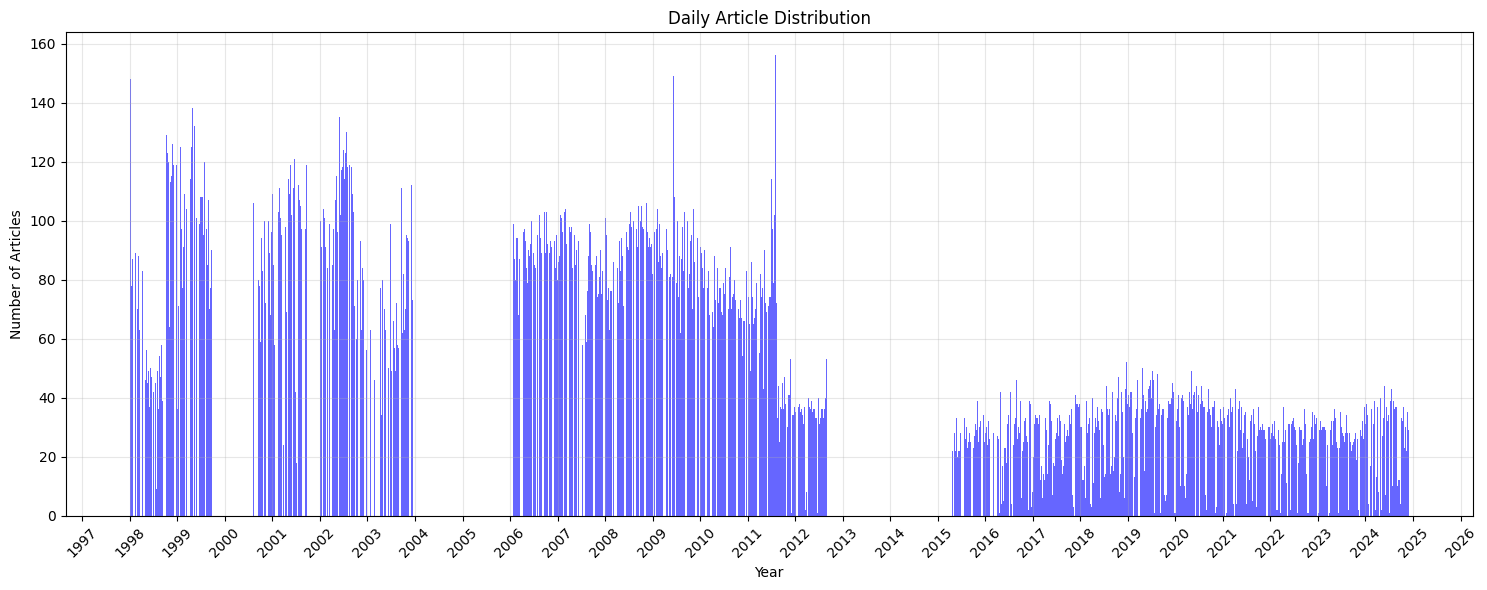

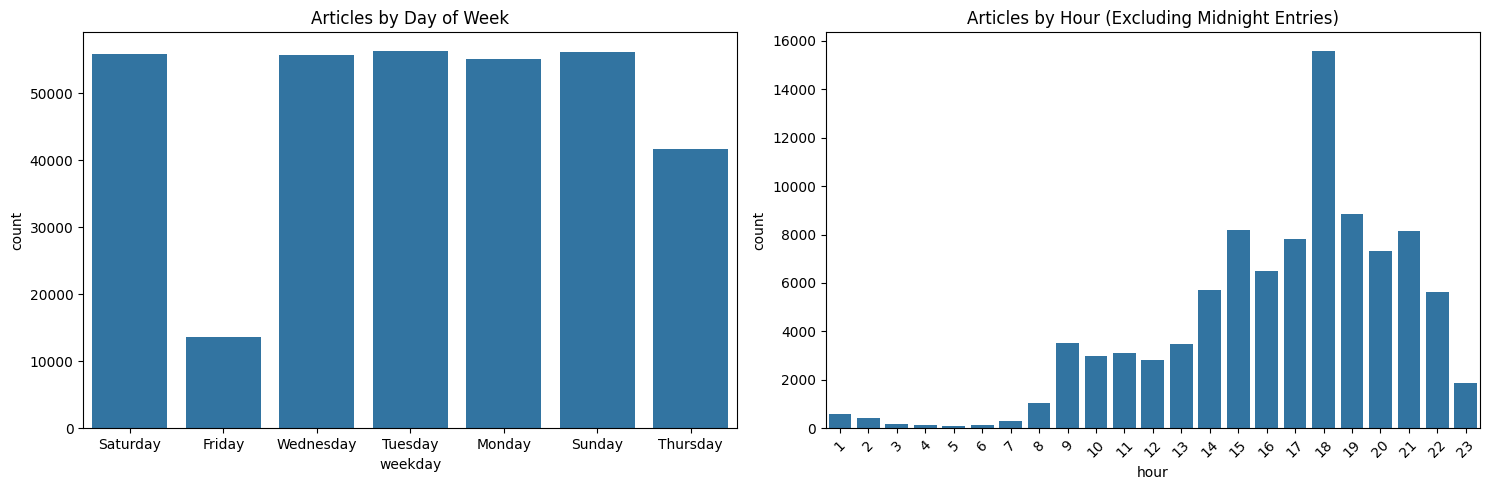


Gaps in data (7+ days):
Gap from 1998-03-19 to 1998-04-04 (16 days)
Gap from 1999-03-18 to 1999-04-03 (16 days)
Gap from 1999-09-25 to 2000-08-02 (312 days)
Gap from 2001-01-18 to 2001-01-28 (10 days)
Gap from 2001-08-21 to 2001-09-12 (22 days)
Gap from 2001-09-25 to 2001-10-09 (14 days)
Gap from 2001-10-18 to 2002-01-06 (80 days)
Gap from 2002-03-19 to 2002-04-06 (18 days)
Gap from 2003-03-18 to 2003-04-05 (18 days)
Gap from 2003-05-04 to 2003-05-12 (8 days)
Gap from 2003-07-06 to 2003-07-14 (8 days)
Gap from 2003-12-14 to 2004-01-28 (45 days)
Gap from 2004-01-28 to 2006-01-08 (711 days)
Gap from 2006-03-19 to 2006-04-06 (18 days)
Gap from 2006-07-17 to 2006-07-25 (8 days)
Gap from 2007-03-17 to 2007-04-03 (17 days)
Gap from 2007-06-17 to 2007-06-25 (8 days)
Gap from 2007-07-03 to 2007-07-11 (8 days)
Gap from 2008-03-18 to 2008-04-05 (18 days)
Gap from 2009-03-18 to 2009-04-04 (17 days)
Gap from 2010-03-18 to 2010-04-03 (16 days)
Gap from 2011-03-17 to 2011-04-02 (15 days)
Gap from 2

In [11]:
"""Time-based analysis of article publication patterns"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from datetime import datetime, timedelta

# Load data
df = pd.read_csv("../data/processed/articles.csv", sep=';')

# Custom date parser for the specific format
def parse_date(date_str):
    try:
        # Handle the format "Day DD Month YYYY - HH:MM"
        return pd.to_datetime(date_str, format='%a %d %B %Y - %H:%M')
    except:
        try:
            # Fallback for dates without time
            return pd.to_datetime(date_str.split(' - ')[0], format='%a %d %B %Y')
        except:
            return pd.NaT

# Convert dates with custom parser
df['date_for_analysis'] = df['published_date'].apply(parse_date)
df['weekday'] = df['date_for_analysis'].dt.day_name()
df['hour'] = df['date_for_analysis'].dt.hour

# Daily distribution
def plot_daily_distribution():
    df_daily = df.groupby(df['date_for_analysis'].dt.date).size()
    
    fig, ax = plt.subplots(figsize=(15, 6))
    ax.bar(df_daily.index, df_daily.values, width=1, color='blue', alpha=0.6)
    
    ax.xaxis.set_major_locator(mdates.YearLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))
    plt.xticks(rotation=45)
    
    plt.title('Daily Article Distribution')
    plt.xlabel('Year')
    plt.ylabel('Number of Articles')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

plot_daily_distribution()

# Publication patterns
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))

# Weekly pattern
sns.countplot(data=df, x='weekday', ax=ax1)
ax1.set_title('Articles by Day of Week')
plt.xticks(rotation=45)

# Hourly pattern - exclude hour 0 as it's likely default values
df_with_real_time = df[df['hour'] != 0]  # Exclude midnight entries
sns.countplot(data=df_with_real_time, x='hour', ax=ax2)
ax2.set_title('Articles by Hour (Excluding Midnight Entries)')

plt.tight_layout()
plt.show()

# Find gaps in the data
def find_gaps(df, threshold_days=7):
    dates = sorted(df['date_for_analysis'].dropna().unique())
    gaps = []
    
    for i in range(len(dates)-1):
        delta = dates[i+1] - dates[i]
        if delta > timedelta(days=threshold_days):
            gaps.append({
                'start': dates[i],
                'end': dates[i+1],
                'duration_days': delta.days
            })
    
    return gaps

# Find and print gaps
gaps = find_gaps(df)
print("\nGaps in data (7+ days):")
for gap in gaps:
    print(f"Gap from {gap['start'].date()} to {gap['end'].date()} ({gap['duration_days']} days)")